In [100]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


In [101]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [102]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [103]:
df.columns
df.drop(['tripduration', 'starttime','stoptime', 'start station id', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1,inplace = True)


In [104]:
df.head()

,start station name,birth year
0,1 Ave & E 44 St,1960.0
1,9 Ave & W 18 St,1963.0
2,E 24 St & Park Ave S,1974.0
3,Fulton St & Waverly Ave,1969.0
4,5 Ave & E 29 St,1977.0


# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [105]:
#df is the dataframe where the content of the csv file is stored
df['age'] = 2015 - df['birth year']


In [106]:
#dropping some data I no longer need
#... your code here...
df.head()

,start station name,birth year,age
0,1 Ave & E 44 St,1960.0,55.0
1,9 Ave & W 18 St,1963.0,52.0
2,E 24 St & Park Ave S,1974.0,41.0
3,Fulton St & Waverly Ave,1969.0,46.0
4,5 Ave & E 29 St,1977.0,38.0


In [107]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,birth year,age
count,279924.000000,279924.000000
mean,1974.951419,40.048581
std,11.574637,11.574637
min,1899.000000,16.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,1999.000000,116.000000


In [108]:
# dropping NaN values
np.random.seed(166)
df['age'].dropna(inplace= True)
df.describe()
sizeSample=df.age.count()
meanSample=df.age.mean()
stanSample=df.age.std()
normalN=np.random.normal(meanSample,stanSample,sizeSample)
poissonN=np.random.poisson(meanSample,sizeSample)
dfnormal=pd.DataFrame(normalN)
dfnormal.columns = ['age']
dfpoisson=pd.DataFrame(poissonN)
dfpoisson.columns = ['age']

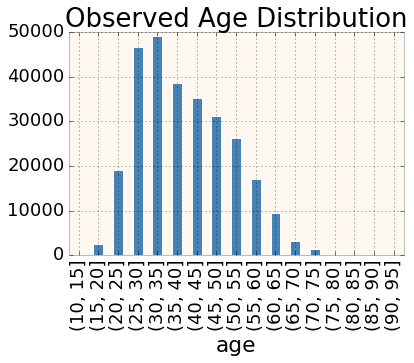

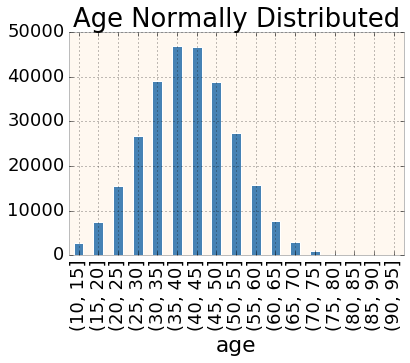

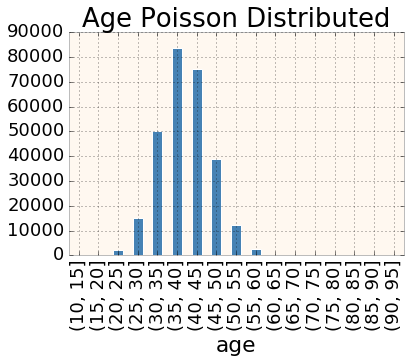

In [109]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axobserved = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axobserved.set_title("Observed Age Distribution")
axnormal = dfnormal.age.groupby(pd.cut(dfnormal.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axnormal.set_title("Age Normally Distributed")
axpoisson = dfpoisson.age.groupby(pd.cut(dfpoisson.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                              legend=False)
axpoisson.set_title("Age Poisson Distributed")

# Figure 1: histogrammed distribution of riders' ages by gender

('Against Normal',           count_nonzero
age                    
(10, 15]       0.010191
(15, 20]       0.027943
(20, 25]       0.015098
(25, 30]       0.055257
(30, 35]       0.091067
(35, 40]       0.061141
(40, 45]       0.019758
(45, 50]       0.008116
(50, 55]       0.012247
(55, 60]       0.007784
(60, 65]       0.001685
(65, 70]       0.001087
(70, 75]       0.000288
(75, 80]       0.000026
(80, 85]       0.000010
(85, 90]       0.000057
(90, 95]       0.000000)


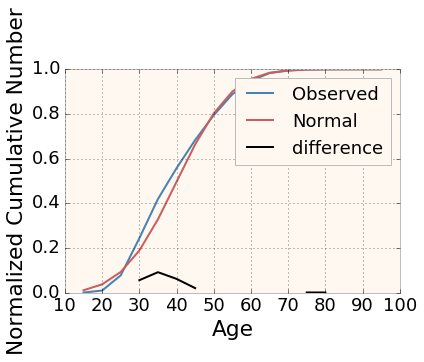

In [110]:
#print df.ageS, df.ageS.cumsum()

csobserved=df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).cumsum()
csnormal=dfnormal.age.groupby(pd.cut(dfnormal.age, bins)).agg([count_nonzero]).cumsum()
cspoisson=dfpoisson.age.groupby(pd.cut(dfpoisson.age, bins)).agg([count_nonzero]).cumsum()

print ('Against Normal',np.abs(csobserved / csobserved.max()-csnormal / csnormal.max()))


pl.plot(bins[:-1] + 5, csobserved / csobserved.max(), label = "Observed")
pl.plot(bins[:-1] + 5, csnormal / csnormal.max(), label = "Normal")
pl.plot(bins[:-1] + 5, np.sqrt(csobserved / csobserved.max() - csnormal / csnormal.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

('Against Poisson',           count_nonzero
age                    
(10, 15]       0.000007
(15, 20]       0.008513
(20, 25]       0.069502
(25, 30]       0.182455
(30, 35]       0.178837
(35, 40]       0.017946
(40, 45]       0.124013
(45, 50]       0.151644
(50, 55]       0.101897
(55, 60]       0.049464
(60, 65]       0.016937
(65, 70]       0.005804
(70, 75]       0.001058
(75, 80]       0.000268
(80, 85]       0.000075
(85, 90]       0.000061
(90, 95]       0.000000)


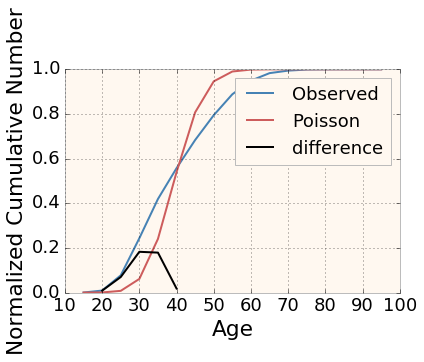

In [111]:
print ('Against Poisson',np.abs(csobserved / csobserved.max()-cspoisson / cspoisson.max()))
pl.plot(bins[:-1] + 5, csobserved / csobserved.max(), label = "Observed")
pl.plot(bins[:-1] + 5, cspoisson / cspoisson.max(), label = "Poisson")
pl.plot(bins[:-1] + 5, np.sqrt(csobserved / csobserved.max() - cspoisson / cspoisson.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [48]:
import scipy.stats

# KS tests comparing  Observed vs Normal

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [49]:
ks = scipy.stats.ks_2samp(df.age, dfnormal.age)
print (ks)

Ks_2sampResult(statistic=0.087688086766407991, pvalue=0.0)


Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

### $H_0:$ the samples come from the same parent distribution
$$\alpha = 0.05     $$

$$c(\alpha) = 1.36         $$

$$D(n_1,n_2)  >  c(\alpha)\sqrt{\frac{n_1+n_2}{n_1n_2}}       $$

In [118]:
n2 = df['age'].count()
n1 = dfnormal['age'].count()
root = np.sqrt((n2 + n1) / (n1 * n2))

g = root * 1.36
if ks[0] > g:
    print(ks[0],' > ', g)
    print('Null Hypothes is rejected, the distributions dont come from the same parent distribution ')
else: 
    print('Null Hypothes holds, the samples come from the same parent distribution ')



(0.20538789099898547, ' > ', 0.0)
Null Hypothes is rejected, the distributions dont come from the same parent distribution 


# KS tests comparing  Observed vs Poisson

In [115]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [116]:
ks = scipy.stats.ks_2samp(df.age, dfpoisson.age)
print (ks)

Ks_2sampResult(statistic=0.20538789099898547, pvalue=0.0)


In [119]:
n2 = df['age'].count()
n1 = dfpoisson['age'].count()
root = np.sqrt((n2 + n1) / (n1 * n2))

g = root * 1.36
if ks[0] > g:
    print(ks[0],' > ', g)
    print('Null Hypothes is rejected, the distributions dont come from the same parent distribution ')
else: 
    print('Null Hypothes holds, the samples come from the same parent distribution ')



(0.20538789099898547, ' > ', 0.0)
Null Hypothes is rejected, the distributions dont come from the same parent distribution 


# AD tests comparing  Observed vs Normal

In [120]:
ad=scipy.stats.anderson(df.age, dist='norm')
print (ad)
#dfagesort=df.age.sort
#dfnormalsort=dfnormal.age.sort

#ad=scipy.stats.anderson_ksamp([dfagesort,dfnormalsort], midrank=True)
#ad=scipy.stats.anderson_ksamp([df.age,dfnormal.age], midrank=True)


AndersonResult(statistic=2732.9753468575072, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [121]:

g=0.787
if ad[0] > g:
    print(ad[0],' > ', g)
    print('Null Hypothes is rejected, the distributions of the 2 sames are not the same ')
else: 
    print('Null Hypothes holds, the samples come from the same parent distribution ')



(2732.9753468575072, ' > ', 0.787)
Null Hypothes is rejected, the distributions of the 2 sames are not the same 


# AD tests comparing  Observed vs Poisson

### Poisson can not be done with this method

# X2 tests comparing  Observed vs Normal

In [127]:
xs=scipy.stats.chisquare(df.age, dfnormal.age, ddof=39)
print(xs)
print('Null Hypothes is rejected, the distributions of the 2 sames are not the same ')
print ('the p-value is too small')

Power_divergenceResult(statistic=2113599.8991942285, pvalue=0.0)
Null Hypothes is rejected, the distributions of the 2 sames are not the same 
the p-value is too small


# X2 tests comparing  Observed vs Poisson

In [128]:
xs=scipy.stats.chisquare(df.age, dfpoisson.age, ddof=39)
print(xs)
print('Null Hypothes is rejected, the distributions of the 2 sames are not the same ')
print ('the p-value is too small')

Power_divergenceResult(statistic=1256842.3939663472, pvalue=0.0)
Null Hypothes is rejected, the distributions of the 2 sames are not the same 
the p-value is too small
